In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Clean The Data

##### There are no missing values, and the data set appears to be super clean, with dummies already included.

In [4]:
df.columns = df.columns.str.replace(' ','')

In [6]:
df.drop(['url','timedelta'],axis=1,inplace=True)

In [7]:
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    vif_array = np.array([])
    tolerance_array = np.array([])
    
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared = smf.ols(formula, data=data).fit().rsquared   #rsquared is the fitting of the model.
        
        vif = 1/(1-r_squared)
        vif_array = np.append(vif_array,vif).round(2)
        
        tolerance = 1-r_squared
        tolerance_array = np.append(tolerance_array,tolerance).round(2)
    
    df_vif = pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [9]:
df_v = df.copy()

In [10]:
df_v.drop(['is_weekend'],axis=1,inplace=True)
df_v.drop(['weekday_is_monday'],axis=1,inplace=True)
df_v.drop(['LDA_04'],axis=1,inplace=True)
df_v.drop(['n_unique_tokens'],axis=1,inplace=True)
df_v.drop(['n_non_stop_unique_tokens'],axis=1,inplace=True)
df_v.drop(['self_reference_avg_sharess'],axis=1,inplace=True)
df_v.drop(['rate_positive_words'],axis=1,inplace=True)
df_v.drop(['kw_max_min'],axis=1,inplace=True)

In [11]:
get_vif(exogs=df_v.columns,data=df_v)

,VIF,Tolerance
n_tokens_title,1.09,0.92
n_tokens_content,2.19,0.46
n_non_stop_words,1.00,1.00
num_hrefs,1.64,0.61
num_self_hrefs,1.37,0.73
num_imgs,1.43,0.70
num_videos,1.24,0.81
average_token_length,2.95,0.34
num_keywords,1.49,0.67
data_channel_is_lifestyle,2.32,0.43


In [20]:
df_v.shape

(39644, 51)

# Remove Outliers First

In [88]:
df1 = df_v.copy()
def iqr_fun(i,dff):
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = round(Q75+1.5*IQR,0)+1
    MinQ = round((Q25-1.5*IQR),0)-1
    print(MinQ, MaxQ)
    return [MinQ, MaxQ]

In [89]:
Q25 = df1['shares'].quantile(0.25)
Q75 = df1['shares'].quantile(0.75)
IQR = Q75-Q25
sMaxQ = Q75+1.5*IQR
sMinQ = max(Q25-1.5*IQR,0.0)
print(sMinQ, sMaxQ)

0.0 5581.0


In [90]:
df1.drop(['kw_max_max'],axis=1,inplace=True)

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min',"kw_avg_min", "kw_min_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df1)
    print(q)
    
    df1 = df1[(df1[n]<=q[1]) & (df1[n]>=q[0])  ]

n_tokens_title
3.0 17.0
[3.0, 17.0]
n_tokens_content
-460.0 1422.0
[-460.0, 1422.0]
num_hrefs
-11.0 27.0
[-11.0, 27.0]
num_self_hrefs
-5.0 9.0
[-5.0, 9.0]
num_imgs
-1.0 5.0
[-1.0, 5.0]
num_videos
-3.0 3.0
[-3.0, 3.0]
num_keywords
1.0 15.0
[1.0, 15.0]
kw_min_min
-9.0 13.0
[-9.0, 13.0]
kw_avg_min
-158.0 602.0
[-158.0, 602.0]
kw_min_max
-11851.0 19751.0
[-11851.0, 19751.0]
kw_avg_max
-10158.0 521534.0
[-10158.0, 521534.0]
kw_min_avg
-2347.0 3911.0
[-2347.0, 3911.0]
kw_max_avg
903.0 7858.0
[903.0, 7858.0]
kw_avg_avg
1106.0 4204.0
[1106.0, 4204.0]
self_reference_min_shares
-2073.0 5085.0
[-2073.0, 5085.0]
self_reference_max_shares
-4361.0 9177.0
[-4361.0, 9177.0]


In [91]:
df1 = df1[df1.shares<=sMaxQ+1000]
df1.reset_index(drop=True, inplace=True)

In [92]:
df1.shape

(12762, 50)

# Standardize

In [22]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #For standardizing columns 
    return (x-x.mean())/x.std()

In [93]:
cols_stand = ['n_tokens_title','n_tokens_content',"average_token_length",'num_hrefs','num_self_hrefs','num_imgs',
              'num_videos','num_keywords',
              'kw_min_min', "kw_avg_min", "kw_min_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for i in cols_stand:
    df1[i] = standardize(df1[i])

In [94]:
df1.head()


,n_tokens_title,n_tokens_content,n_non_stop_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.226315,-0.000912,1.0,0.693619,-1.202038,-0.175771,-0.576702,-0.466654,-0.119859,1.0,...,0.100000,0.750000,-0.202083,-0.4,-0.05,0.400,0.200,0.100,0.200,2000
1,0.702215,-1.047326,1.0,-0.531934,-0.714577,-0.175771,-0.576702,0.170269,-1.784318,0.0,...,0.050000,1.000000,-0.400000,-0.4,-0.40,0.350,-0.200,0.150,0.200,1200
2,-0.725484,-0.216453,1.0,0.285101,-1.202038,-0.175771,-0.576702,0.606613,0.989780,0.0,...,0.100000,0.600000,-0.288889,-0.5,-0.10,0.200,-0.075,0.300,0.075,761
3,-0.725484,-0.943032,1.0,-0.327675,0.260346,-0.175771,-0.576702,0.198480,-0.674678,0.0,...,0.100000,0.285714,-0.275000,-0.3,-0.25,0.050,0.000,0.450,0.000,2700
4,1.178114,-1.189861,1.0,-0.736193,0.260346,-1.275373,-0.576702,-0.243867,0.989780,0.0,...,0.136364,0.800000,-0.300000,-0.4,-0.20,0.375,-0.125,0.125,0.125,1100


In [95]:
df1.shape

(12762, 50)

# Check for Multicollinearity

# Categorize Shares into Bins. Start with 2.

In [96]:
df6 = df1.copy()

In [27]:
sns.set()

In [97]:
ser, bins = pd.qcut(df6["shares"], 2, retbins=True, labels=['poor','good'])
df6['share_cat'] = pd.cut(df6["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [98]:
df6.isna().sum()

n_tokens_title                   0
n_tokens_content                 0
n_non_stop_words                 0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday 

In [99]:
df6.drop(['shares'],axis=1,inplace=True)

In [100]:
df6.head()

,n_tokens_title,n_tokens_content,n_non_stop_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,share_cat
0,0.226315,-0.000912,1.0,0.693619,-1.202038,-0.175771,-0.576702,-0.466654,-0.119859,1.0,...,0.100000,0.750000,-0.202083,-0.4,-0.05,0.400,0.200,0.100,0.200,1
1,0.702215,-1.047326,1.0,-0.531934,-0.714577,-0.175771,-0.576702,0.170269,-1.784318,0.0,...,0.050000,1.000000,-0.400000,-0.4,-0.40,0.350,-0.200,0.150,0.200,1
2,-0.725484,-0.216453,1.0,0.285101,-1.202038,-0.175771,-0.576702,0.606613,0.989780,0.0,...,0.100000,0.600000,-0.288889,-0.5,-0.10,0.200,-0.075,0.300,0.075,0
3,-0.725484,-0.943032,1.0,-0.327675,0.260346,-0.175771,-0.576702,0.198480,-0.674678,0.0,...,0.100000,0.285714,-0.275000,-0.3,-0.25,0.050,0.000,0.450,0.000,1
4,1.178114,-1.189861,1.0,-0.736193,0.260346,-1.275373,-0.576702,-0.243867,0.989780,0.0,...,0.136364,0.800000,-0.300000,-0.4,-0.20,0.375,-0.125,0.125,0.125,0


In [129]:
from sklearn.model_selection import train_test_split

X_tr1, X_t1, y_tr1,y_t1 = train_test_split(df6.drop('share_cat',axis=1), df6['share_cat'], test_size=0.2)

In [130]:
from sklearn.linear_model import LogisticRegression

log2_model = LogisticRegression()

log2_model.fit(X_tr1,y_tr1)

y_p_tr1= log2_model.predict(X_tr1)
y_p_t1= log2_model.predict(X_t1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:
from sklearn.metrics import accuracy_score
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr1)
acc_score_t1 = accuracy_score(y_t1, y_p_t1)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

from sklearn.metrics import balanced_accuracy_score

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr1)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t1)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 

precision_tr2 = precision_score(y_tr1, y_p_tr1)
precision_t2 = precision_score(y_t1, y_p_t1)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr1, y_p_tr1)
recall_t2 = recall_score(y_t1, y_p_t1)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr1, y_p_tr1)
f1_score_t = f1_score(y_t1, y_p_t1)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.656577529630718
Acc Score on testing set: 0.6564825695260478

Balanced Acc Score on traning set: 0.6558845575456018
Balanced Acc Score on testing set: 0.6569099378881988
Precision Score on training set: 0.6645021645021645
Precision Score on testing set: 0.6773080241587576

Recall Score on training set: 0.6108237166732988
Recall Score on testing set: 0.609472049689441

F1 Score on training set: 0.636533278042712
F1 Score on testing set: 0.6416019615856151


In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_t1, y_p_t1)

array([[879, 393],
       [524, 757]], dtype=int64)

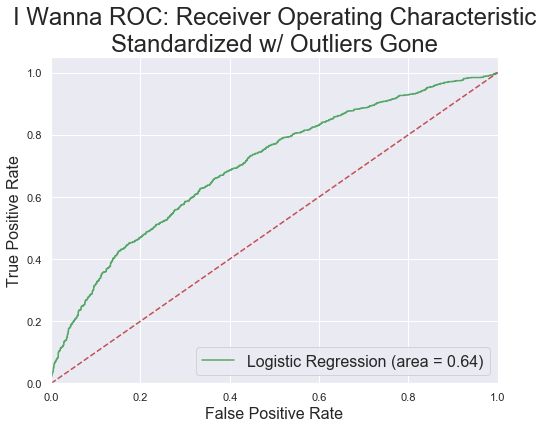

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_t1, y_p_t1)
fpr, tpr, thresholds = roc_curve(y_t1, log2_model.predict_proba(X_t1)[::,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('I Wanna ROC: Receiver Operating Characteristic\nStandardized w/ Outliers Gone',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

### Try first doing some feature selection.

In [106]:
df2 = df.copy()

In [107]:
df2.drop(['kw_max_max'],axis=1,inplace=True)

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min',"kw_avg_min", "kw_min_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df2)
    print(q)
    
    df2 = df2[(df2[n]<=q[1]) & (df2[n]>=q[0])  ]

n_tokens_title
3.0 17.0
[3.0, 17.0]
n_tokens_content
-460.0 1422.0
[-460.0, 1422.0]
num_hrefs
-11.0 27.0
[-11.0, 27.0]
num_self_hrefs
-5.0 9.0
[-5.0, 9.0]
num_imgs
-1.0 5.0
[-1.0, 5.0]
num_videos
-3.0 3.0
[-3.0, 3.0]
num_keywords
1.0 15.0
[1.0, 15.0]
kw_min_min
-9.0 13.0
[-9.0, 13.0]
kw_avg_min
-158.0 602.0
[-158.0, 602.0]
kw_min_max
-11851.0 19751.0
[-11851.0, 19751.0]
kw_avg_max
-10158.0 521534.0
[-10158.0, 521534.0]
kw_min_avg
-2347.0 3911.0
[-2347.0, 3911.0]
kw_max_avg
903.0 7858.0
[903.0, 7858.0]
kw_avg_avg
1106.0 4204.0
[1106.0, 4204.0]
self_reference_min_shares
-2073.0 5085.0
[-2073.0, 5085.0]
self_reference_max_shares
-4361.0 9177.0
[-4361.0, 9177.0]


In [108]:
df2 = df2[df2.shares<=sMaxQ+1000]
df2.reset_index(drop=True, inplace=True)

In [109]:
cols_stand = ['n_tokens_title','n_tokens_content',"average_token_length",'num_hrefs','num_self_hrefs','num_imgs',
              'num_videos','num_keywords',
              'kw_min_min', "kw_avg_min", "kw_min_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for i in cols_stand:
    df2[i] = standardize(df2[i])

In [110]:
ser, bins = pd.qcut(df2["shares"], 2, retbins=True, labels=['poor','good'])
df2['share_cat'] = pd.cut(df2["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [111]:
df2.drop(['shares'],axis=1,inplace=True)

In [112]:
X_tr1, X_t1, y_tr1,y_t1 = train_test_split(df2.drop('share_cat',axis=1), df2['share_cat'], test_size=0.2)

In [153]:
log2_model2.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>

In [113]:
log2_model2 = LogisticRegression(solver='liblinear') #lbfgs/liblinear is default

In [114]:
from sklearn.feature_selection import RFE

In [115]:
rfe1 = RFE(log2_model2,n_features_to_select=8)

In [116]:
rfe1.fit(X_tr1,y_tr1)
print(rfe1.ranking_)
print(rfe1.support_)

[48 39  1 36 14 34 42 25 32 37 47 13 44 23  1  1 15 45 50 29 46 24 27 28
  6 12 43 49 21 20 18 19 35  3  2  1  1  5 40 26  1  1  7  1 11 41  8 31
  4 30  9 38 10 17 33 16 22]
[False False  True False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False  True
  True False False False  True  True False  True False False False False
 False False False False False False False False False]


In [76]:
cols = X_tr1.columns[rfe1.support_]
cols

Index(['n_unique_tokens', 'data_channel_is_socmed', 'data_channel_is_tech',
       'weekday_is_saturday', 'is_weekend', 'LDA_00', 'LDA_04',
       'global_subjectivity'],
      dtype='object')

In [77]:
X_tr2, X_t2, y_tr2, y_t2 = train_test_split(df2[cols], df2['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [78]:
log2_model2.fit(X_tr2,y_tr2)

y_p_tr2= log2_model2.predict(X_tr2)
y_p_t2= log2_model2.predict(X_t2)

acc_score_tr2 = accuracy_score(y_tr2, y_p_tr2)
acc_score_t2 = accuracy_score(y_t2, y_p_t2)

print("Acc Score on traning set: {}".format(acc_score_tr2))
print("Acc Score on testing set: {}".format(acc_score_t2)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr2, y_p_tr2)
bacc_score_t2 = balanced_accuracy_score(y_t2, y_p_t2)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr2, y_p_tr2)
precision_t2 = precision_score(y_t2, y_p_t2)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr2, y_p_tr2)
recall_t2 = recall_score(y_t2, y_p_t2)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr2, y_p_tr2)
f1_score_t = f1_score(y_t2, y_p_t2)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6304241355666569
Acc Score on testing set: 0.6149627888758323

Balanced Acc Score on traning set: 0.629404042832183
Balanced Acc Score on testing set: 0.6155067758328627

Precision Score on training set: 0.6421601996823236
Precision Score on testing set: 0.6355555555555555

Recall Score on training set: 0.5630720254675686
Recall Score on testing set: 0.5551242236024845

F1 Score on training set: 0.6000212021626207
F1 Score on testing set: 0.5926232905097388


In [79]:
confusion_matrix(y_t2, y_p_t2)

array([[855, 410],
       [573, 715]], dtype=int64)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_p_t2))

              precision    recall  f1-score   support

           0       0.60      0.68      0.63      1265
           1       0.64      0.56      0.59      1288

   micro avg       0.61      0.61      0.61      2553
   macro avg       0.62      0.62      0.61      2553
weighted avg       0.62      0.61      0.61      2553



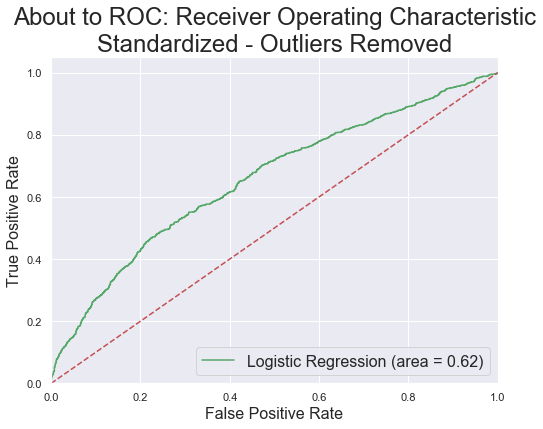

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t2, y_p_t2)
fpr, tpr, thresholds = roc_curve(y_t2, log2_model2.predict_proba(X_t2)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('About to ROC: Receiver Operating Characteristic\nStandardized - Outliers Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [138]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_tr1,y_tr1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [141]:
y_p_t_RF = ks_rf.predict(X_t1)
y_p_tr_RF = ks_rf.predict(X_tr1)
confusion_matrix(y_t1,y_p_t_RF)

array([[884, 381],
       [634, 654]], dtype=int64)

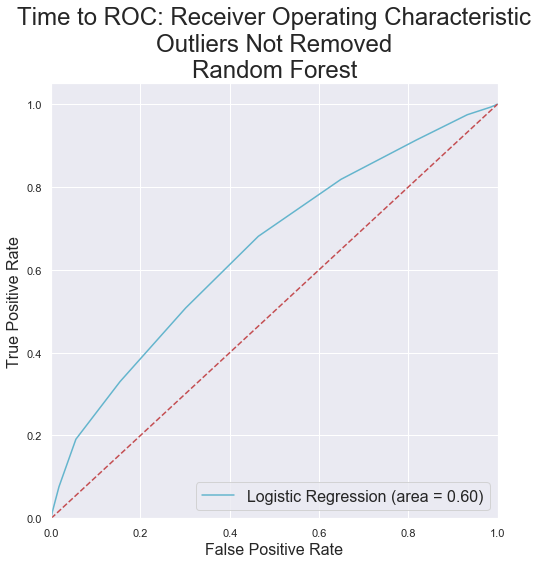

In [140]:
y_pred_proba_RF = ks_rf.predict_proba(X_t1)[:,1]

logit_roc_auc = roc_auc_score(y_t1, y_p_t_RF)

fpr, tpr, thresholds = roc_curve(y_t1, y_pred_proba_RF)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed\nRandom Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()


In [142]:
from sklearn.metrics import accuracy_score
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr_RF)
acc_score_t1 = accuracy_score(y_t1, y_p_t_RF)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

from sklearn.metrics import balanced_accuracy_score

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr_RF)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t_RF)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 

precision_tr2 = precision_score(y_tr1, y_p_tr_RF)
precision_t2 = precision_score(y_t1, y_p_t_RF)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr1, y_p_tr_RF)
recall_t2 = recall_score(y_t1, y_p_t_RF)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr1, y_p_tr_RF)
f1_score_t = f1_score(y_t1, y_p_t_RF)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.9842296013321579
Acc Score on testing set: 0.6024285154719937

Balanced Acc Score on traning set: 0.9840254753998099
Balanced Acc Score on testing set: 0.6032891022021456
Precision Score on training set: 0.9971387696709585
Precision Score on testing set: 0.6318840579710145

Recall Score on training set: 0.9707520891364902
Recall Score on testing set: 0.5077639751552795

F1 Score on training set: 0.9837685250529287
F1 Score on testing set: 0.5630650021523893


In [117]:
df8 = df1.copy()

In [118]:
ser, bins = pd.qcut(df8["shares"], [0,0.333,0.667,1], retbins=True, labels=['poor','good','viral'])
df8['share_cat'] = pd.cut(df8["shares"], bins=bins, labels=[0,1,2], include_lowest=True)

In [119]:
df8.drop(['shares'],axis=1,inplace=True)

In [120]:
X_tr8, X_t8, y_tr8,y_t8 = train_test_split(df8.drop('share_cat',axis=1), df8['share_cat'], test_size=0.2)

In [123]:
log_model8 = LogisticRegression()

log_model8.fit(X_tr8,y_tr8)

y_p_tr8= log_model8.predict(X_tr8)
y_p_t8= log_model8.predict(X_t8)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [124]:
acc_score_tr8 = accuracy_score(y_tr8, y_p_tr8)
acc_score_t8 = accuracy_score(y_t8, y_p_t8)

print("Acc Score on traning set: {}".format(acc_score_tr8))
print("Acc Score on testing set: {}".format(acc_score_t8)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr8, y_p_tr8)
bacc_score_t2 = balanced_accuracy_score(y_t8, y_p_t8)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr8, y_p_tr8, average='micro')
precision_t2 = precision_score(y_t8, y_p_t8,average='micro')

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr8, y_p_tr8, average='micro')
recall_t2 = recall_score(y_t8, y_p_t8, average='micro')

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr8, y_p_tr8, average='micro')
f1_score_t = f1_score(y_t8, y_p_t8, average='micro')
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.4811440885493192
Acc Score on testing set: 0.46650998824911866

Balanced Acc Score on traning set: 0.4852421117976995
Balanced Acc Score on testing set: 0.4698253408685688

Precision Score on training set: 0.4811440885493192
Precision Score on testing set: 0.46650998824911866

Recall Score on training set: 0.4811440885493192
Recall Score on testing set: 0.46650998824911866

F1 Score on training set: 0.4811440885493192
F1 Score on testing set: 0.46650998824911866


In [125]:
confusion_matrix(y_t8, y_p_t8)

array([[519, 191, 129],
       [355, 279, 258],
       [215, 214, 393]], dtype=int64)

In [126]:
print(classification_report(y_t8, y_p_t8))

              precision    recall  f1-score   support

           0       0.48      0.62      0.54       839
           1       0.41      0.31      0.35       892
           2       0.50      0.48      0.49       822

   micro avg       0.47      0.47      0.47      2553
   macro avg       0.46      0.47      0.46      2553
weighted avg       0.46      0.47      0.46      2553



In [149]:
dict1= {'Take':[1,2,3,4,5,6,7,8],"SKLearn Algorithm":['LogisticRegression','LogisticRegression','LogisticRegression',
                                                   'Random Forest','Random Forest','LogisticRegression','LogisticRegression','Random Forest'],
       "Outliers Removed?":['Yes', 'Yes', 'No', 'Yes','No','Yes','Yes','Yes'], "Standardized":['No','No','No','No','No','Yes','Yes','Yes'],
       "Feature Selection":['No','Yes','Yes', 'Yes','Yes','No','Yes','Yes'], "AUC":[0.59,0.62,0.62,0.6,0.6,0.65,0.62,0.61],"Accuracy":
       [0.607,0.62,0.62,0.6,0.6,0.65,0.615,0.602],"Balanced Accuracy":[0.59,0.61,0.62,0.6,0.6,0.65,0.62,0.603],"Precision":[0.61, 0.64,
                                                                                                               0.61, 0.59, 0.6,0.68,
                                                                                                               0.64,0.64],
       "Recall":[0.403,0.42,0.63,0.46,0.5,0.61,0.56,0.5],"F1 Score":[0.485,0.565,0.62,0.52,0.55,0.64,0.59,0.56]}

In [150]:
summary = pd.DataFrame(dict1)

In [151]:
summary

,Take,SKLearn Algorithm,Outliers Removed?,Standardized,Feature Selection,AUC,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,1,LogisticRegression,Yes,No,No,0.59,0.607,0.590,0.61,0.403,0.485
1,2,LogisticRegression,Yes,No,Yes,0.62,0.620,0.610,0.64,0.420,0.565
2,3,LogisticRegression,No,No,Yes,0.62,0.620,0.620,0.61,0.630,0.620
3,4,Random Forest,Yes,No,Yes,0.60,0.600,0.600,0.59,0.460,0.520
4,5,Random Forest,No,No,Yes,0.60,0.600,0.600,0.60,0.500,0.550
5,6,LogisticRegression,Yes,Yes,No,0.65,0.650,0.650,0.68,0.610,0.640
6,7,LogisticRegression,Yes,Yes,Yes,0.62,0.615,0.620,0.64,0.560,0.590
7,8,Random Forest,Yes,Yes,Yes,0.61,0.602,0.603,0.64,0.500,0.560
